
Processing file: visit-pittsburgh-foodfestivals.html

Processing file: taco-festival.html

Processing file: carnegie-museums.html

Processing file: steelers.html

Processing file: city-paper-events.html

Processing file: restaurant-week.html

Processing file: cmu-in-person-events.html

Processing file: the-frick.html

Processing file: penguins.html

Processing file: picklesburgh.html

Processing file: opera.html

Processing file: visit-pittsburgh-homepage.html

Processing file: cmu-about.html

Processing file: pirates.html

Processing file: symphony.html

Processing file: wiki-pittsburgh.html

Processing file: wiki-history-of-pittsburgh.html

Processing file: pittsburgh-events-calendar.html

Processing file: cultural-trust.html

Processing file: tax-forms.html

Processing file: the-city-of-pittsburgh.html

Processing file: banana-split.html

Processing file: heinz-history-center.html

Processing file: little-italy.html

Processing file: cmu-events-calendar.html

Processing file: brita
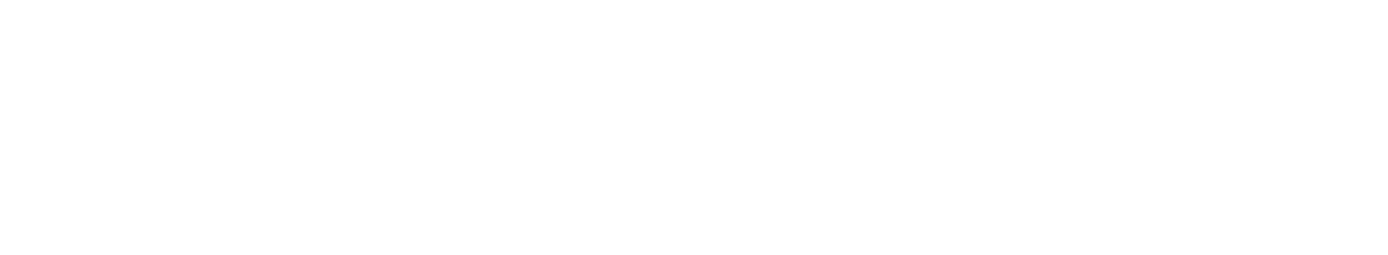
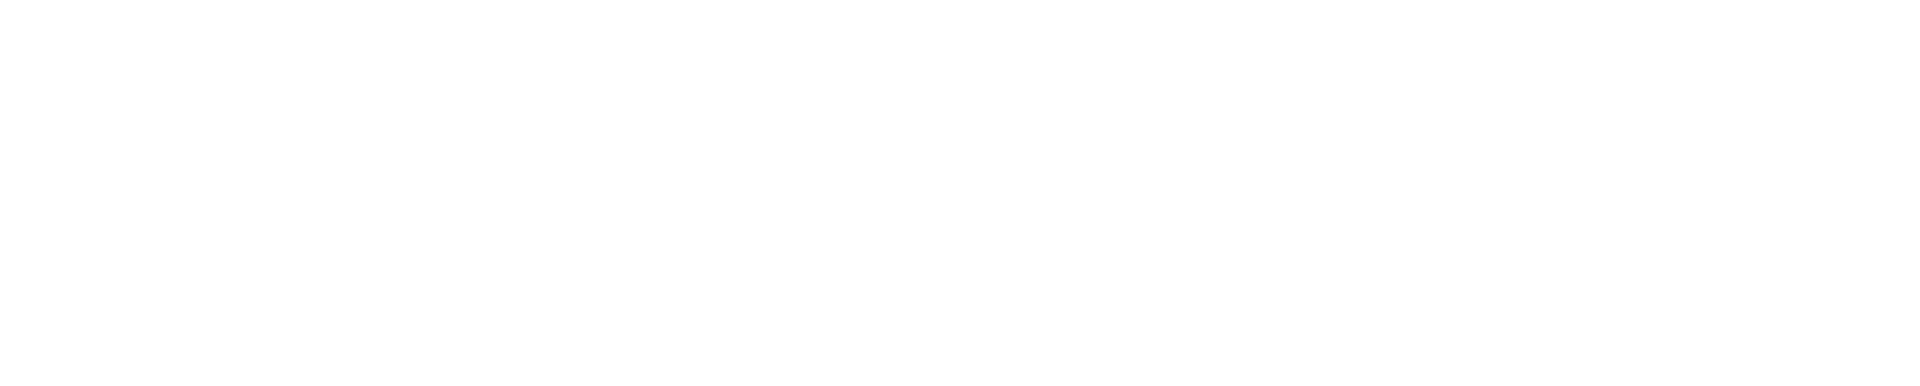
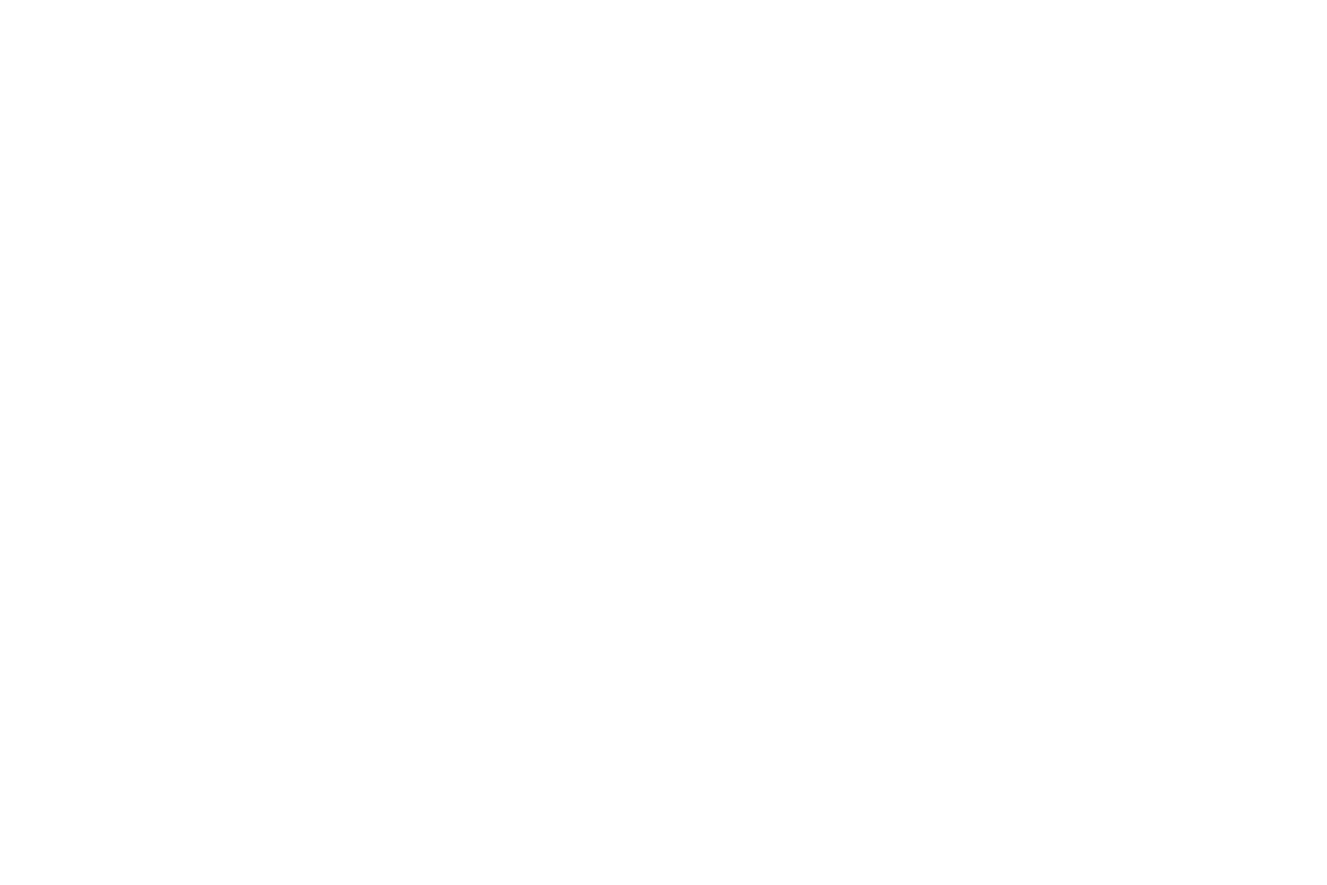
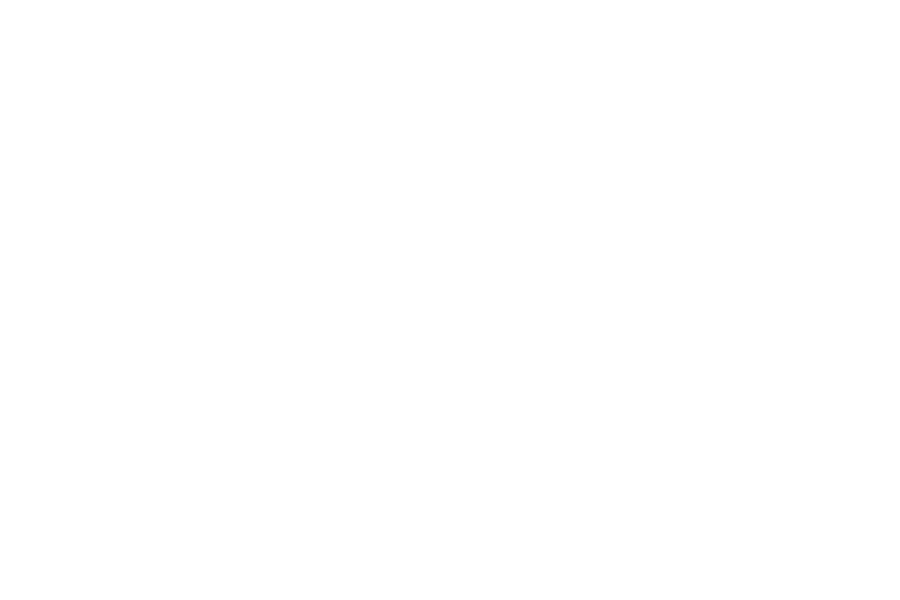
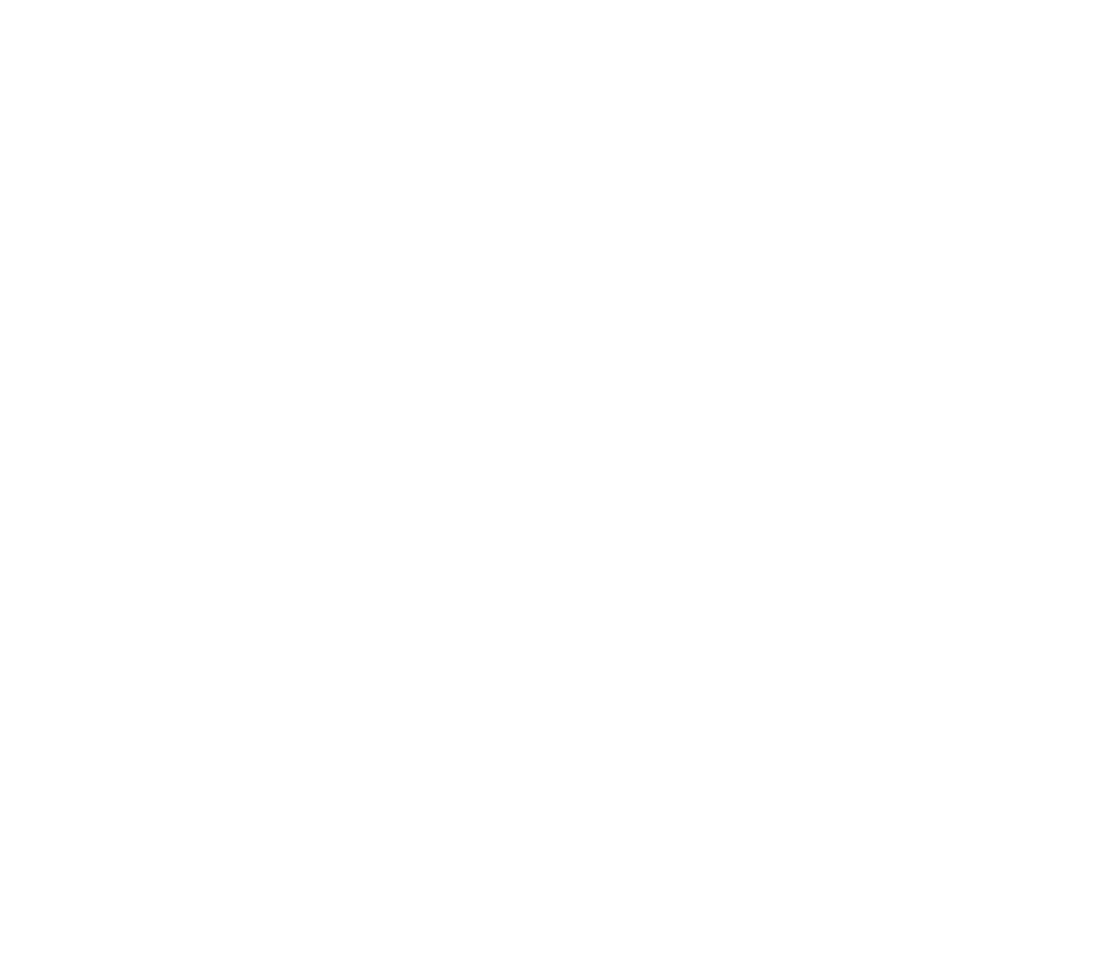

In [7]:
import os
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import pandas as pd


def read_html_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None


def extract_links_from_html(html_content, base_url=None):
    if not html_content:
        return []
    
    soup = BeautifulSoup(html_content, 'html.parser')
    links = []
    
    # Extract links from <a> tags
    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        # Add the link as is (we'll handle relative links later if base_url is provided)
        if base_url and not urlparse(href).netloc and not href.startswith('#') and not href.startswith('javascript:'):
            href = urljoin(base_url, href)
        links.append(href)
    
    # Extract links from <link> tags
    for link_tag in soup.find_all('link', href=True):
        href = link_tag['href']
        if base_url and not urlparse(href).netloc:
            href = urljoin(base_url, href)
        links.append(href)
    
    # Extract links from <script> tags
    for script_tag in soup.find_all('script', src=True):
        src = script_tag['src']
        if base_url and not urlparse(src).netloc:
            src = urljoin(base_url, src)
        links.append(src)
    
    # Extract links from <img> tags
    for img_tag in soup.find_all('img', src=True):
        src = img_tag['src']
        if base_url and not urlparse(src).netloc:
            src = urljoin(base_url, src)
        links.append(src)
    
    return links


def categorize_links(links):
    categories = {
        # Common web protocols
        'https': [],
        'http': [],
        'ftp': [],
        'ftps': [],
        
        # Web page elements
        'relative': [],
        'anchor': [],
        
        # Communication protocols
        'mailto': [],
        'tel': [],
        'sms': [],
        
        # Media and data protocols
        'data': [],
        'blob': [],
        'rtmp': [],
        'rtsp': [],
        
        # File protocols
        'file': [],
        'ipfs': [],
        
        # Secure protocols
        'ssh': [],
        'sftp': [],
        
        # Messaging and chat
        'irc': [],
        
        # Browser-specific
        'about': [],
        'view-source': [],
        'chrome': [],
        'edge': [],
        'firefox': [],
        
        # WebSockets
        'ws': [],
        'wss': [],
        
        # Mobile and app deep links
        'app': [],
        'intent': [],
        'market': [],
        
        # JavaScript and page interactions
        'javascript': [],
        
        # Magnet and specialized links
        'magnet': [],
        
        # Application-specific
        'spotify': [],
        'steam': [],
        'slack': [],
        'whatsapp': [],
        'discord': [],
        'skype': [],
        'telegram': [],
        
        # Other
        'other': []
    }
    
    # Check against known prefixes
    for link in links:
        link_lower = link.lower()
        
        # Web protocols
        if link_lower.startswith('https://'):
            categories['https'].append(link)
        elif link_lower.startswith('http://'):
            categories['http'].append(link)
        elif link_lower.startswith('ftp://'):
            categories['ftp'].append(link)
        elif link_lower.startswith('ftps://'):
            categories['ftps'].append(link)
        
        # Web page elements
        elif link_lower.startswith('#'):
            categories['anchor'].append(link)
        elif link_lower.startswith('/') or (not urlparse(link).netloc and not urlparse(link).scheme):
            categories['relative'].append(link)
        
        # Communication
        elif link_lower.startswith('mailto:'):
            categories['mailto'].append(link)
        elif link_lower.startswith('tel:'):
            categories['tel'].append(link)
        elif link_lower.startswith('sms:'):
            categories['sms'].append(link)
        
        # Data and media
        elif link_lower.startswith('data:'):
            categories['data'].append(link)
        elif link_lower.startswith('blob:'):
            categories['blob'].append(link)
        elif link_lower.startswith('rtmp://'):
            categories['rtmp'].append(link)
        elif link_lower.startswith('rtsp://'):
            categories['rtsp'].append(link)
        
        # File and content
        elif link_lower.startswith('file://'):
            categories['file'].append(link)
        elif link_lower.startswith('ipfs://'):
            categories['ipfs'].append(link)
        
        # Secure protocols
        elif link_lower.startswith('ssh://'):
            categories['ssh'].append(link)
        elif link_lower.startswith('sftp://'):
            categories['sftp'].append(link)
        
        # Messaging
        elif link_lower.startswith('irc://'):
            categories['irc'].append(link)
        
        # Browser
        elif link_lower.startswith('about:'):
            categories['about'].append(link)
        elif link_lower.startswith('view-source:'):
            categories['view-source'].append(link)
        elif link_lower.startswith('chrome://'):
            categories['chrome'].append(link)
        elif link_lower.startswith('edge://'):
            categories['edge'].append(link)
        elif link_lower.startswith('firefox:') or link_lower.startswith('about:'):
            categories['firefox'].append(link)
        
        # WebSockets
        elif link_lower.startswith('ws://'):
            categories['ws'].append(link)
        elif link_lower.startswith('wss://'):
            categories['wss'].append(link)
        
        # Mobile and apps
        elif link_lower.startswith('app://'):
            categories['app'].append(link)
        elif link_lower.startswith('intent:'):
            categories['intent'].append(link)
        elif link_lower.startswith('market://'):
            categories['market'].append(link)
        
        # JavaScript
        elif link_lower.startswith('javascript:'):
            categories['javascript'].append(link)
        
        # Magnet
        elif link_lower.startswith('magnet:'):
            categories['magnet'].append(link)
        
        # Application-specific
        elif link_lower.startswith('spotify:'):
            categories['spotify'].append(link)
        elif link_lower.startswith('steam://'):
            categories['steam'].append(link)
        elif link_lower.startswith('slack://'):
            categories['slack'].append(link)
        elif link_lower.startswith('whatsapp://'):
            categories['whatsapp'].append(link)
        elif link_lower.startswith('discord://'):
            categories['discord'].append(link)
        elif link_lower.startswith('skype:'):
            categories['skype'].append(link)
        elif link_lower.startswith('tg://') or link_lower.startswith('telegram:'):
            categories['telegram'].append(link)
        
        # Fallback for anything else
        else:
            categories['other'].append(link)
    
    # Remove empty categories to keep results clean
    return {k: v for k, v in categories.items() if v}



def display_links(categories):
    total_links = sum(len(links) for links in categories.values())
    print(f"\n===== LINK CATEGORIES (Total: {total_links}) =====")
    
    # Get non-empty categories
    non_empty_categories = {cat: links for cat, links in categories.items() if links}
    
    # Sort categories by count (descending)
    sorted_categories = sorted(non_empty_categories.items(), 
                              key=lambda x: len(x[1]), 
                              reverse=True)
    
    # Display links by category
    for category, links in sorted_categories:
        print(f"\n----- {category.upper()} LINKS ({len(links)}) -----")
        for i, link in enumerate(links[:10], 1):  # Show only first 10 links per category
            print(f"{i}. {link}")
        if len(links) > 10:
            print(f"... and {len(links) - 10} more {category} links")
    
    # Print summary
    print("\n===== SUMMARY =====")
    print(f"Total links found: {total_links}")
    
    # Create a visual representation of the distribution
    if total_links > 0:
        print("\nDistribution of link types:")
        for category, links in sorted_categories:
            percentage = len(links) / total_links * 100
            bar_length = int(percentage // 2)  # Each █ represents 2%
            print(f"{category.ljust(12)}: {'█' * bar_length} {percentage:.1f}% ({len(links)})")


def extract_links_from_file(file_path, base_url=None, display=True):
    # Check if file exists
    if not os.path.isfile(file_path):
        print(f"Error: File not found - {file_path}")
        return {}
    
    # Read the HTML file
    html_content = read_html_file(file_path)
    
    if not html_content:
        return {}
    
    # Extract links
    all_links = extract_links_from_html(html_content, base_url)
    
    # Categorize links
    categories = categorize_links(all_links)
    
    # Print the links if display is True
    if display:
        display_links(categories)
    
    return categories


def extract_links_from_directory(directory_path, base_url=None, extension='.html'):
    """
    Extract links from all HTML files in a directory.
    
    Args:
        directory_path (str): Path to the directory containing HTML files
        base_url (str, optional): Base URL for resolving relative links
        extension (str): File extension to filter by
        
    Returns:
        dict: Dictionary with filenames as keys and categories dict as values
    """
    if not os.path.isdir(directory_path):
        print(f"Error: Directory not found - {directory_path}")
        return {}
    
    results = {}
    all_categories = {}
    
    for filename in os.listdir(directory_path):
        if filename.endswith(extension):
            file_path = os.path.join(directory_path, filename)
            print(f"\nProcessing file: {filename}")
            categories = extract_links_from_file(file_path, base_url, display=False)
            results[filename] = categories
            
            # Aggregate links by category across all files
            for category, links in categories.items():
                if category not in all_categories:
                    all_categories[category] = []
                all_categories[category].extend(links)
    
    # Display summary of all files
    print("\n===== DIRECTORY SUMMARY =====")
    print(f"Total files processed: {len(results)}")
    
    total_links = sum(len(links) for links in all_categories.values())
    print(f"Total links found: {total_links}")
    
    # Show category distribution across all files
    if total_links > 0:
        print("\nDistribution of link types across all files:")
        sorted_categories = sorted(all_categories.items(), 
                                  key=lambda x: len(x[1]), 
                                  reverse=True)
        
        for category, links in sorted_categories:
            percentage = len(links) / total_links * 100
            bar_length = int(percentage // 2)  # Each █ represents 2%
            print(f"{category.ljust(12)}: {'█' * bar_length} {percentage:.1f}% ({len(links)})")
    
    return results


def links_to_dataframe(categories):
    all_data = []
    
    for category, links in categories.items():
        for link in links:
            parsed = urlparse(link)
            
            data = {
                'link': link,
                'type': category,
                'domain': parsed.netloc,
                'path': parsed.path,
                'query': parsed.query,
                'fragment': parsed.fragment,
                'has_query': bool(parsed.query),
                'path_depth': len([p for p in parsed.path.split('/') if p]),
                'extension': os.path.splitext(parsed.path)[1].lower() if parsed.path else ''
            }
            all_data.append(data)
    
    df = pd.DataFrame(all_data)
    return df


def analyze_link_dataframe(df):
    analysis = {}
    
    # Category distribution
    analysis['category_counts'] = df['type'].value_counts()
    
    # Top domains
    analysis['top_domains'] = df['domain'].value_counts().head(10)
    
    # File extensions
    extensions_df = df[df['extension'] != '']
    if not extensions_df.empty:
        analysis['extension_counts'] = extensions_df['extension'].value_counts().head(10)
    
    # Path depth analysis
    analysis['path_depth_stats'] = df['path_depth'].describe()
    
    # Distribution of links with query parameters
    analysis['query_parameter_counts'] = df['has_query'].value_counts()
    
    print("===== LINK ANALYSIS =====")
    print("\nTop 10 Domains:")
    print(analysis['top_domains'])
    
    print("\nCategory Counts:")
    print(analysis['category_counts'])
    
    if 'extension_counts' in analysis:
        print("\nTop File Extensions:")
        print(analysis['extension_counts'])
    
    print("\nQuery Parameter Usage:")
    print(f"Links with query parameters: {analysis['query_parameter_counts'].get(True, 0)}")
    print(f"Links without query parameters: {analysis['query_parameter_counts'].get(False, 0)}")
    
    return analysis


# 1. Process a single file
# file_path = '../data/raw/html/banana-split.html'
# categories = extract_links_from_file(file_path, 'https://bananasplitfest.com')
# print(categories)

# 2. Process multiple files in a directory
results = extract_links_from_directory('../data/raw/html/')
print(results)